# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos]

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
# def funcion(self):
#     pass

df_market = pd.read_csv("Smarket.csv")
df_market.drop(columns=df_market.columns[0], inplace=True)

df_market["Direction"] = df_market["Direction"].map({"Up": 1, "Down": 0})
print(df_market.head())
print(df_market.columns)

XTotal = df_market.drop(columns=["Direction"])  ### Definicion de variables predictoras
XTotal = XTotal.apply(pd.to_numeric, errors='coerce')
yTotal = df_market["Direction"]   ### Definicion de Variable objetivo
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0) ### Definición de datos de entrenamiento y de prueba

# datos para analisis preliminar
df_xtrain = pd.DataFrame(XTrain) ### Dataframe con datos de entrenamiento para análisis preliminar
df_ytrain = pd.DataFrame(yTrain) ### Dataframe con datos de variable de respuesta

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913          1
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965          1
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112          0
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760          1
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057          1
Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Direction'], dtype='object')


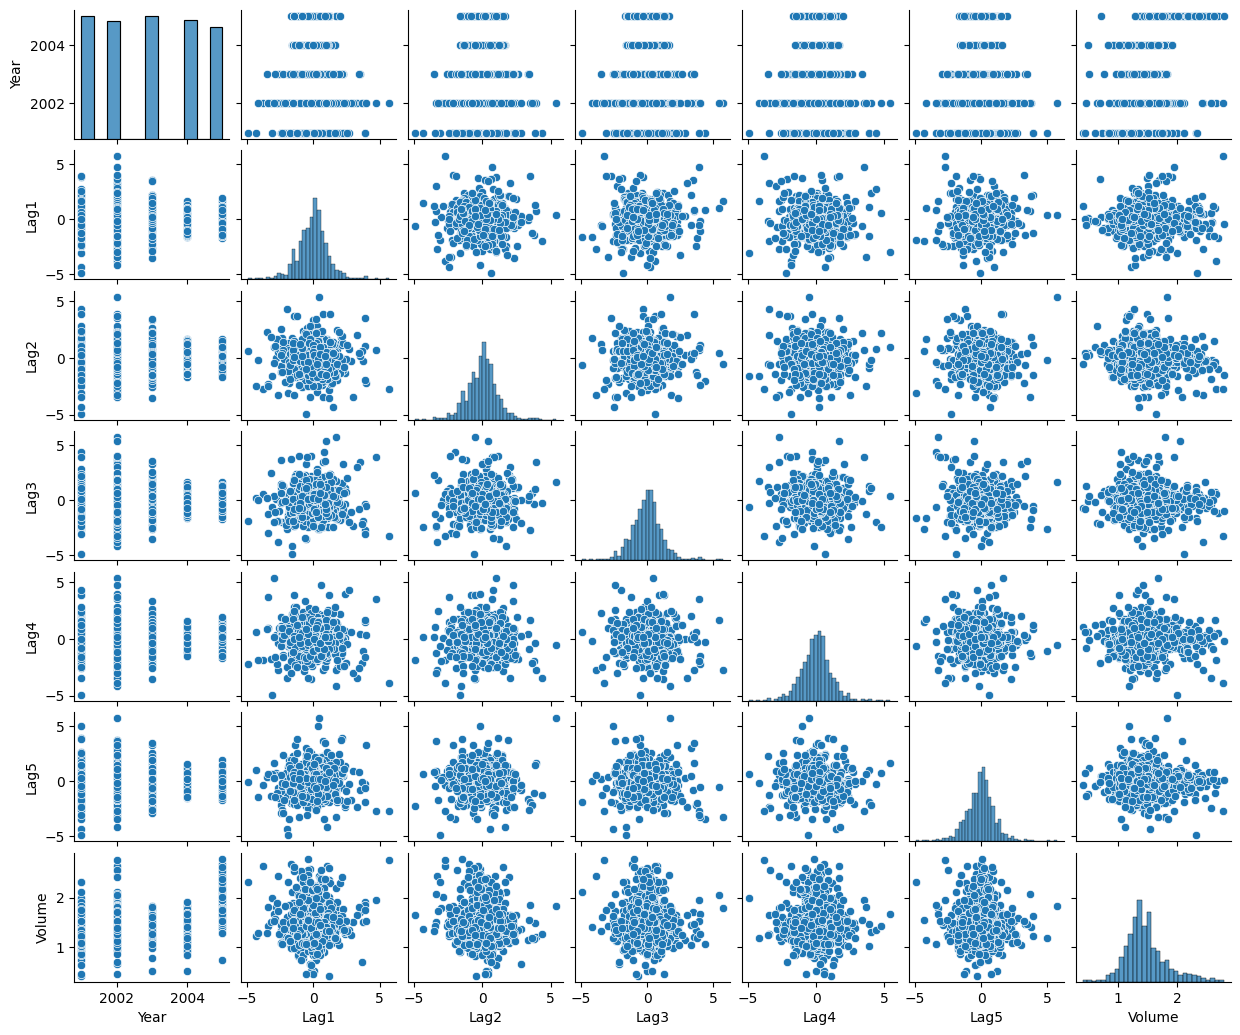

In [ ]:
### Correlogramas de variables predictoras
import matplotlib.pyplot as plt

sns.pairplot(df_xtrain, kind="scatter", height=1.5, aspect= 1.2)  # Ajusta el tamaño
plt.show()

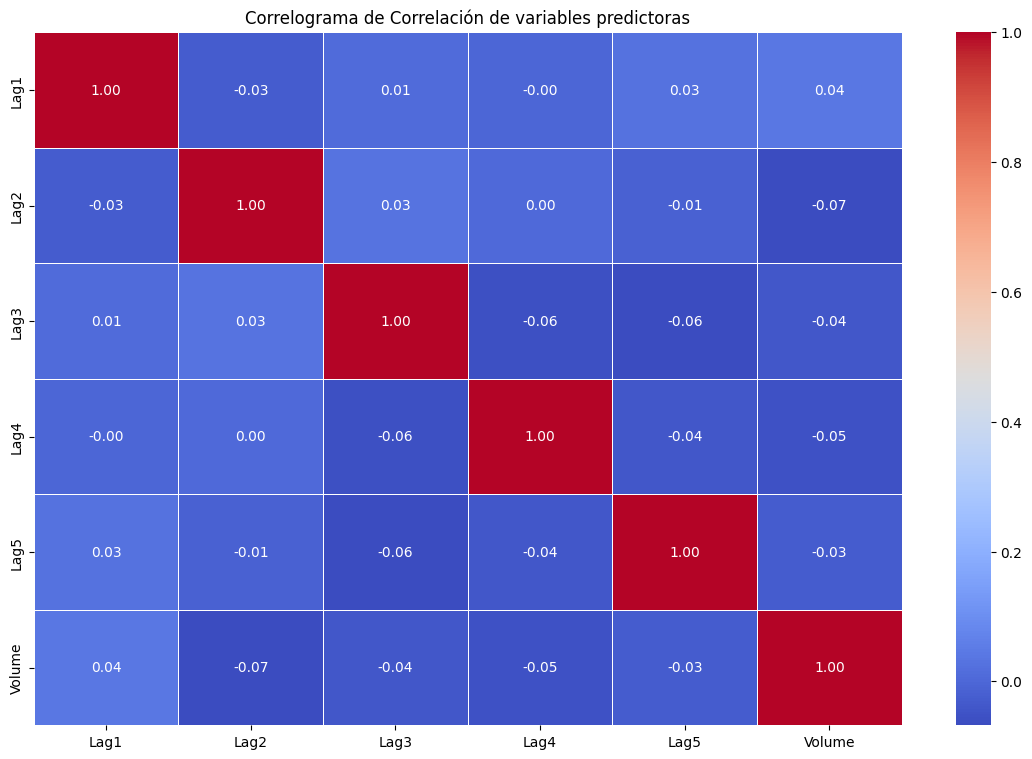

In [ ]:
# Mapa de calor de correlaciones entre variables predictoras
df_xtrain = pd.DataFrame(XTrain)
correlation_matrix = df_xtrain.iloc[:, 1:].corr()

plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlograma de Correlación de variables predictoras")
plt.show()

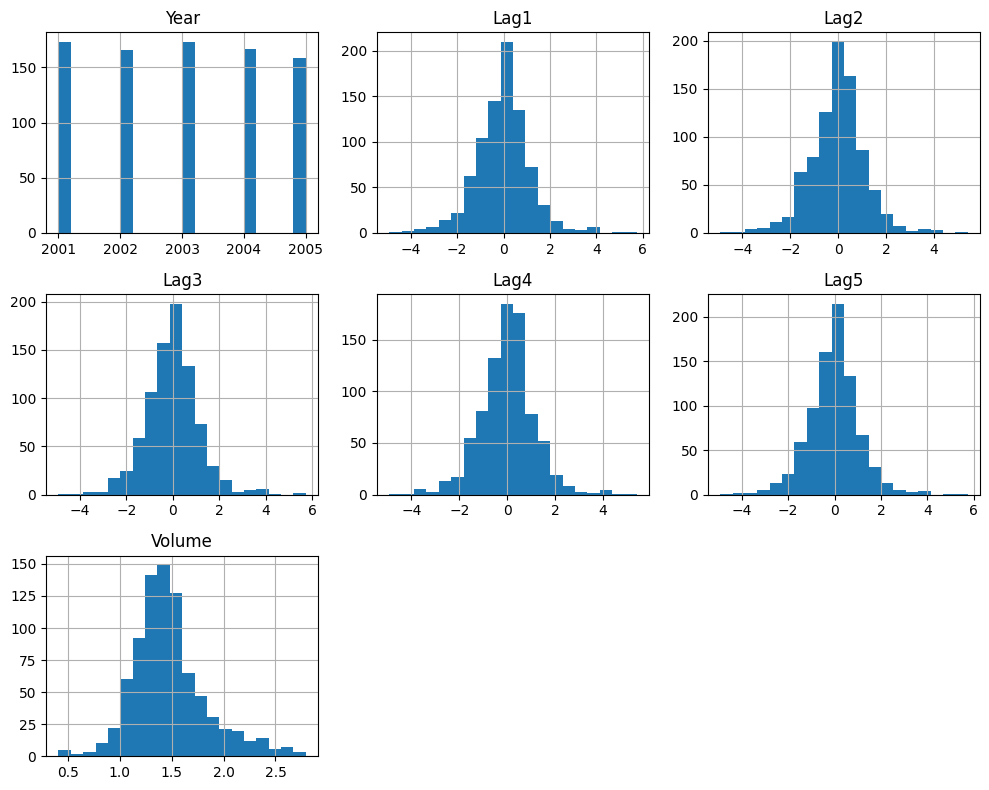

In [ ]:
### Histograma de variables predictoras
df_xtrain.hist(bins=20, figsize=(10, 8))
plt.tight_layout()  # asegurarse de que las subgráficas no se solapen
plt.show()

In [ ]:
### Estadisticas descriptivas de variables predictoras
print(df_xtrain.describe())

              Year        Lag1        Lag2        Lag3        Lag4  \
count   837.000000  837.000000  837.000000  837.000000  837.000000   
mean   2002.965352   -0.030867   -0.016918   -0.013855    0.004643   
std       1.407429    1.152928    1.125858    1.160519    1.138602   
min    2001.000000   -4.922000   -4.922000   -4.922000   -4.922000   
25%    2002.000000   -0.705000   -0.654000   -0.687000   -0.645000   
50%    2003.000000    0.032000    0.041000    0.001000    0.046000   
75%    2004.000000    0.585000    0.593000    0.590000    0.615000   
max    2005.000000    5.733000    5.408000    5.733000    5.408000   

             Lag5      Volume  
count  837.000000  837.000000  
mean    -0.025357    1.475894  
std      1.113726    0.358453  
min     -4.922000    0.410300  
25%     -0.640000    1.261200  
50%      0.016000    1.417700  
75%      0.555000    1.629200  
max      5.733000    2.792030  


In [ ]:
print(df_ytrain.describe())

        Direction
count  837.000000
mean     0.528076
std      0.499510
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


**Procedimiento**

En primer lugar, se cargó el conjunto de datos Smarket.csv utilizando pandas. Después de cargar los datos, se eliminó la primera columna y se transformó la variable Direction en una variable binaria, asignando un valor de 1 a "Up" y 0 a "Down". Esto facilita la predicción de la dirección del índice financiero S&P500.

Se separaron las variables predictoras, todos los datos excepto la columna Direction,  y se almacenaron en la variable XTotal, mientras que la variable objetivo (Direction) se almacenó en yTotal. Luego, los datos se dividieron en un conjunto de entrenamiento y un conjunto de prueba utilizando train_test_split, con el 33% de los datos destinados para la prueba y el resto para el entrenamiento.



**Análisis y conclusiones**

Las estadísticas descriptivas muestran que las variables Lag tienen una gran dispersión en los valores, con valores que van desde negativos hasta muy positivos, lo que puede ser un indicio de volatilidad.

La variable Direction tiene una distribución equilibrada con valores 0 y 1 en casi igual proporción, lo que es importante para evitar que los modelos se vean sesgados.

Los histogramas al igual que las estadísticas descriptivas mostraron que las variables predictoras tienen distribuciones variadas, algunas más centradas y otras más dispersas.

El análisis de correlación reveló que algunas variables tienen relaciones fuertes entre sí. Este análisis es útil para identificar qué variables podrían ser redundantes.

Ademas de esto, como la variable Direction está equilibrada, no es necesario realizar un ajuste en el balance de clases, lo que es positivo, ya que los modelos no estarán sesgados hacia una clase en particular.

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

# crear el objeto
clfLDA = LinearDiscriminantAnalysis()
# ajustar el modelo
clfLDA.fit(XTrain, yTrain)

# crear predicciones (la categoria)
prediccionesLDA=clfLDA.predict(XTest)
# devuelve probabildiad de cada clase/categoria para cada observacion
prediccionesProbLDA=clfLDA.predict_proba(XTest)

# dimensionar errores
errorLDA=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=prediccionesLDA[i]):
        # agregar al error relativo
        errorLDA+=1/len(yTest)

# proporcion de muestras que fueron mal clasificadas
print('El error de clasificación para LDA en la muestra de test es:')
print(errorLDA)


El error de clasificación para LDA en la muestra de test es:
0.4794188861985494


Matriz de confusión del modelo LDA:
[[ 54 153]
 [ 45 161]]
El accuracy de la predicción con el modelo LCA es: 0.5206
La precisión de la predicción con el modelo LCA es: 0.5127


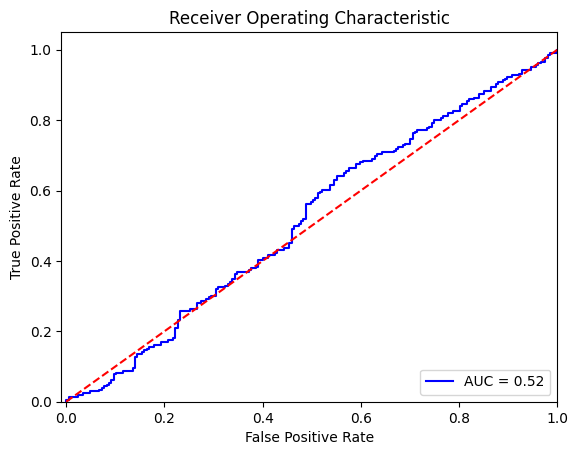

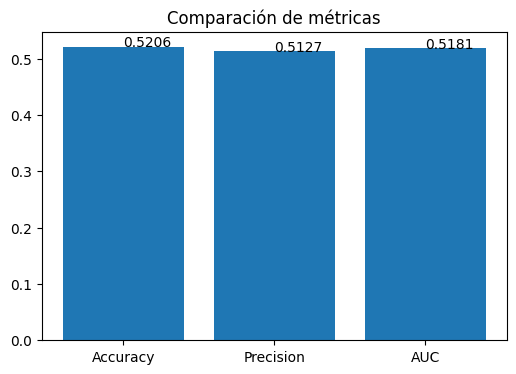

In [ ]:
# matriz de confusion
print("Matriz de confusión del modelo LDA:")
print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))

# acuracy
accuracyLDA = round(accuracy_score(y_true=yTest, y_pred=prediccionesLDA),4)
print(f"El accuracy de la predicción con el modelo LCA es: {accuracyLDA}")

# precision
precisionLDA = round(precision_score(y_true=yTest, y_pred=prediccionesLDA),4)
print(f"La precisión de la predicción con el modelo LCA es: {precisionLDA}")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbLDA[:,1], pos_label=1)
AUC_LDA=round(metrics.auc(fpr, tpr),4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_LDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# comparativa
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Comparación de métricas")
ejeX = ['Accuracy', 'Precision','AUC']
ejeY = [accuracyLDA,precisionLDA,AUC_LDA]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

**Procedimiento**

Entrenamiento y predicción del modelo:

* Se creó el objeto clfLDA utilizando LinearDiscriminantAnalysis.
* Se ajustó el modelo a los datos de entrenamiento con .fit(XTrain, yTrain).
* Se generaron las predicciones sobre el conjunto de test usando .predict(XTest) y se obtuvieron las probabilidades de las clases con .predict_proba(XTest).

Cálculo de métricas y evaluación del modelo:

* Se calculó el error de clasificación comparando las predicciones con las etiquetas reales del conjunto de test.
* Se imprimió la matriz de confusión utilizando confusion_matrix().
* Se calcularon el accuracy y la precisión con accuracy_score() y precision_score(), respectivamente.
* Se generó la curva ROC y se calculó el AUC utilizando roc_curve() y auc().
* Finalmente, se visualizó una comparativa de las métricas (Accuracy, Precision y AUC) mediante un gráfico de barras.



**Análisis y conclusiones**

El error de clasificación obtenido fue de 0.4794, lo que indica que aproximadamente el 48% de las predicciones fueron incorrectas. La matriz de confusión muestra que el modelo identificó correctamente 54 instancias positivas (verdaderos positivos) y 161 instancias negativas (verdaderos negativos). Por otro lado, se produjo 153 falsos positivos y 45 falsos negativos. El accuracy del modelo fue de 0.5206, lo que sugiere que el modelo acertó el 52% de las predicciones. Además, la precisión del modelo se estimó en 0.5127, indicando que, en promedio, el 51.27% de las predicciones positivas fueron correctas, es decir se si el modelo predice positivo, se tiene un 52.27% de probabilidad de que sea verdad. Esto nos lleva a concluir que **el poder predictivo de este modelo, en realidad no es muy bueno**, con un accuracy superior al azar pero lejos de un rendimiento óptimo.

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

### Creacion de clasificador y entrenamiento de modelo
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)

prediccionesQDA=clfQDA.predict(XTest)
prediccionesProbQDA=clfQDA.predict_proba(XTest)

### Calculo de error de clasificación
errorQDA=0
for i in range(0,len(yTest)):
    if(yTest.values[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)

print('El error de clasificación para QDA en la muestra de test es:')
print(errorQDA)

El error de clasificación para QDA en la muestra de test es:
0.501210653753029


La matriz de confusión correspondiente a la predicción en tes del modelo QDA es la siguiente:
[[ 62 145]
 [ 62 144]]

El ACCURACY de la predicción en test usando el modelo QDA es: 0.49878934624697335

La PRECISIÓN de la predicción en test usando el modelo QDA es: 0.4982698961937716



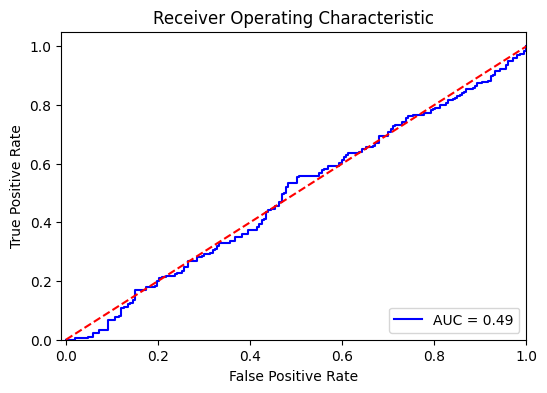

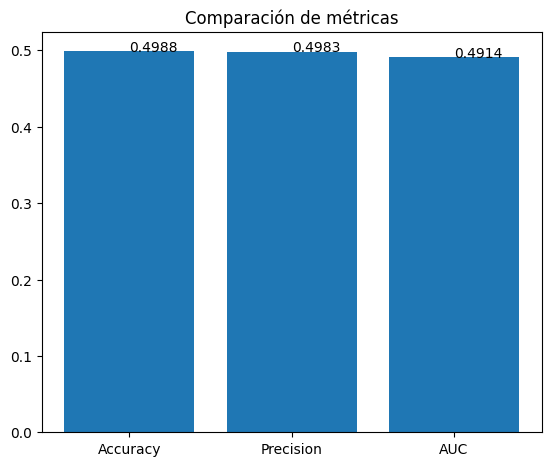

In [ ]:
### MATRIZ DE CONFUSION
print('La matriz de confusión correspondiente a la predicción en tes del modelo QDA es la siguiente:')
print(confusion_matrix(y_true=yTest, y_pred=prediccionesQDA))

## ACCURACY
accuracyQDA=accuracy_score(y_true=yTest, y_pred=prediccionesQDA)
print(f'\nEl ACCURACY de la predicción en test usando el modelo QDA es: {accuracyQDA}')

### PRECISIÓN
precisionQDA=precision_score(y_true=yTest, y_pred=prediccionesQDA)
print(f'\nLa PRECISIÓN de la predicción en test usando el modelo QDA es: {precisionQDA}\n')

### CURVA ROC Y AUC
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbQDA[:,1], pos_label=1)
AUCQDA=metrics.auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCQDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.subplots_adjust(hspace=0.5)
plt.show()

print("")

### COMPARACION DE METRICAS
fig = plt.figure(figsize=(5, 4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['Accuracy', 'Precision','AUC']
valores_ejeY = [accuracyQDA,precisionQDA,AUCQDA]
ejeY = [round(num, 4) for num in valores_ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.subplots_adjust(hspace=0.5)
plt.show()

### **Procedimiento**

**Entrenamiento Modelo QDA**
* Creación de clasificador de *Análisis Discriminante Cuadratico* (QDA)
* Entrenamiento de modelo con datos XTrain y yTrain usando fit()

**Predicciones**
* Se predicen las clases para los datos de Test con predict(XTest)
* Se calculan las probabilidades de pertenencia a cada clase con predict_proba(XTest)

**Error de clasificación**
* Se calcula el error de clasificacion con los resultados obtenidos en la etapa de predicción

**Matriz de Confusión**
* Se genera la matriz comparando etiquetas reales de yTest vs las predicciones

**Calculo de Métricas**
Se calculan las medidas de desempeño de modelos de clasificación como:
* Accuracy: Proporción de predicciones correctas
* Precisión: Proporción de positivos correctamente clasificados
* Curva ROC y AUC: Se calculan valores de Tasa de falsos positivos y verdaderos positivos y se obtiene el area vajo la curva<br><br>

### **Análisis y Conclusiones**

Se concluye que el model QDA no es el apropiado para la clasificación de este grupo de datos, ni tiene poder predictivo pues sus resultados equivalen a una clasficiación aleatoria.

Puesto que:
* El error de clasificacion = 0.501 (50.1%), lo que significa que el modelo comete errores en la mitad de las predicciones, lo cual indica que no clasifica mejor que el azar.

* Matriz de confusion: 62 casos verdaderos positivos, 145 casos falsos negativos, 62 casos falsos positivos y 144 casos como verdaderos negativos, esto indica que el modelo esta cometiendo bastantes errores en ambas clases, aunque tuvo mejor desempeño identificando casos de la clase 0 = 'Down'

* Accuracy del 50% sugiere que el modelo no es mejor que una clasificacion aleatoria y la precision igual al 50% indica que de los casos predichos como positivos son realmente positivos, lo cual es bajo

* AUC de 0.49 indica que este modelo no tiene capacidad de clasificacion pues tiene menor performance que un modelo aleatorio

Se recomienda probar otros modelos.


### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
# Modelo con la muestra de entrenamiento
clfNB = GaussianNB()
clfNB.fit(XTrain, yTrain)

# Estimar las predicciones
prediccionesNB = clfNB.predict(XTest)
prediccionesProbNB = clfNB.predict_proba(XTest)

# Calcular el error de predicción para el modelo
errorNB = 0
for i in range(0, len(yTest)):
    if yTest.iloc[i] != prediccionesNB[i]:  # Si la predicción no es igual al valor real
        errorNB += 1 / len(yTest)

# El error de clasificación es:
print('El error de clasificación para Naive Bayes en la muestra de test es:')
print(errorNB)


El error de clasificación para Naive Bayes en la muestra de test es:
0.4721549636803895


In [ ]:
# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(yTest, prediccionesNB))


Matriz de confusión:
[[ 60 147]
 [ 48 158]]


In [ ]:
# Exactitud
accuracyNB = accuracy_score(yTest, prediccionesNB)
print("Accuracy del modelo Naive Bayes: ", accuracyNB)

Accuracy del modelo Naive Bayes:  0.5278450363196125


In [ ]:
# Precisión
precisionNB = precision_score(yTest, prediccionesNB)
print("Precisión del modelo Naive Bayes: ", precisionNB)

Precisión del modelo Naive Bayes:  0.5180327868852459


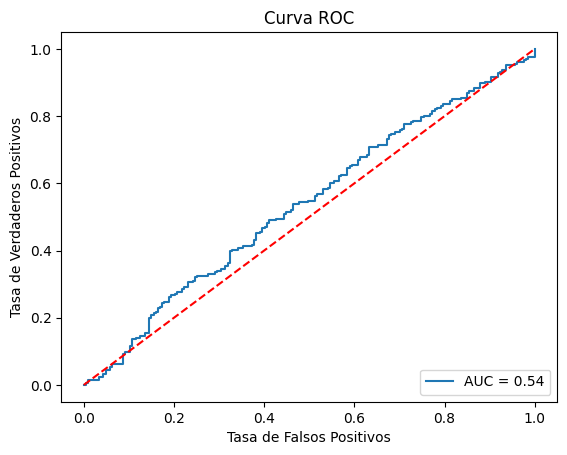

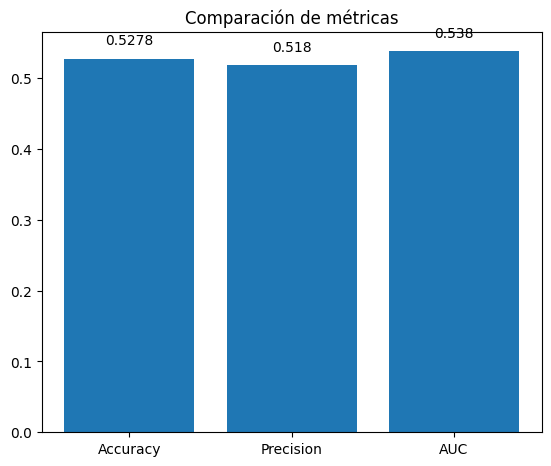

In [ ]:
# curva ROC para evaluar el rendimiento del modelo
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbNB[:, 1])
AUC_NB = metrics.auc(fpr, tpr)

# Curva ROC
plt.plot(fpr, tpr, label='AUC = %.2f' % AUC_NB)  # La curva ROC
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Comparación de métricas
fig = plt.figure(figsize=(5, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Comparación de métricas")

ejeX = ['Accuracy', 'Precision', 'AUC']
valores_ejeY = [accuracyNB, precisionNB, AUC_NB]

ejeY = [round(num, 4) for num in valores_ejeY]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i] + 0.02, y[i], ha='center')
addlabels(ejeX, ejeY, plt)
plt.subplots_adjust(hspace=0.5)
plt.show()

**Procedimiento**

Primero, se entrenó el modelo de Naive Bayes utilizando los datos de entrenamiento, lo que permitió que el modelo aprendiera a predecir las clases a partir de las características proporcionadas. Una vez entrenado, se utilizó el modelo para generar predicciones sobre los datos de prueba, lo que permitió evaluar su rendimiento en un conjunto diferente al de entrenamiento.

Luego, se calcularon diversas métricas para evaluar la efectividad del modelo. Se analizó el error de clasificación, que indica el porcentaje de predicciones incorrectas realizadas por el modelo en el conjunto de prueba. Además, se construyó la matriz de confusión para entender cuántas instancias fueron clasificadas correctamente y cuántas fueron clasificadas incorrectamente, separando los errores en falsos positivos y falsos negativos.

A continuación, se calculo la exactitud y la precisión del modelo. La exactitud indica qué tan bien el modelo clasificó las instancias en general, mientras que la precisión mide la exactitud de las predicciones positivas.

Además, se generó la curva ROC, que muestra la capacidad del modelo para distinguir entre las dos clases, verdaderos positivos y falsos positivos. Se calculó el AUC que se el area bajo la curva, lo que proporciona una medida más precisa de la capacidad de clasificación del modelo.

Finalmente, se compararon las métricas clave del modelo en un gráfico de barras, lo que permitió visualizar de manera clara el rendimiento del modelo en términos de exactitud, precisión y AUC.


**Análisis y Conclusiones**

El error de clasificación del modelo NBC fue de aproximadamente 47.22%, lo que significa que casi la mitad de las predicciones fueron incorrectas. Este resultado es bastante alto, lo que indica que el modelo no está funcionando de manera eficiente.

Al revisar la matriz de confusión, podemos ver que el modelo cometió varios errores. Específicamente, clasificó correctamente 60 instancias como positivas y 158 como negativas, pero también cometió 147 falsos positivos y 48 falsos negativos. Esto quiere decir que tiene dificultades tanto para identificar correctamente las instancias positivas como para evitar confundir las negativas.

En términos de exactitud, el modelo alcanzó un 52.78%, lo que significa que acierta poco más de la mitad de las veces, lo cual es apenas un poco mejor que un modelo aleatorio. En cuanto a precisión, el valor fue de 51.80%, lo que implica que cuando el modelo predice que una instancia es positiva, solo tiene un 51.8% de probabilidad de estar en lo cierto.

Además, la curva ROC y el AUC del modelo fueron de 0.54, lo cual es solo ligeramente mejor que una clasificación aleatoria (AUC = 0.5). Esto indica que el modelo tiene limites en la clasificación y necesita mejoras o probar otros modelos.

Con una exactitud de 52.78%, una precisión de 51.80%, y un AUC de 0.54, el modelo NBC no está ofreciendo buenos resultados en este conjunto de datos. Los resultados son muy cercanos a los de una clasificación aleatoria, por lo que nO satisfacen.


### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

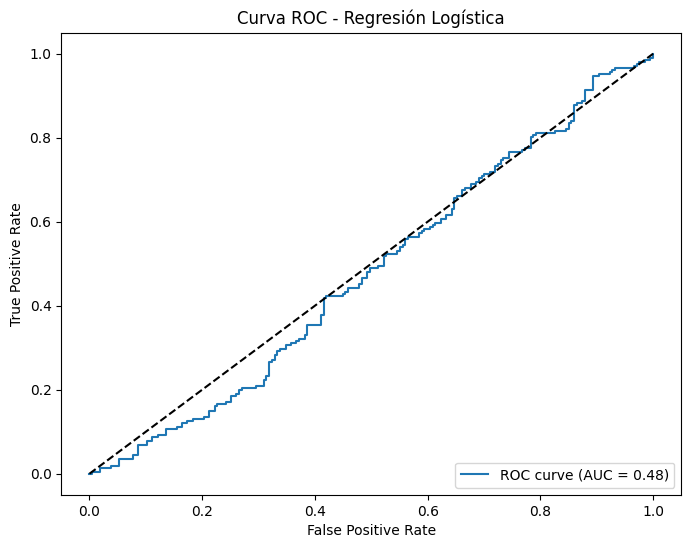

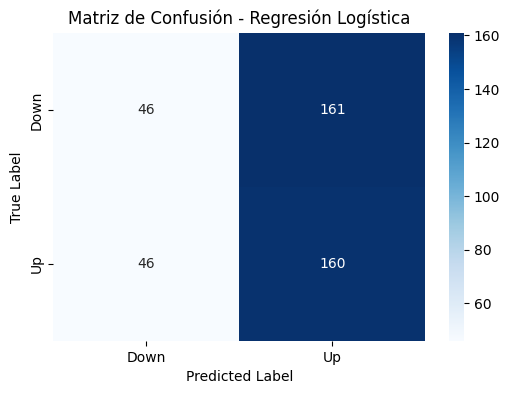

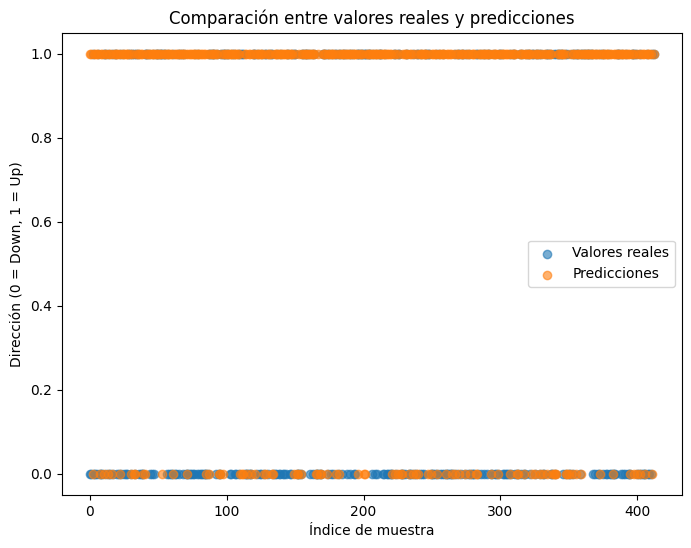

Matriz de Confusión:
[[ 46 161]
 [ 46 160]]
AUC-ROC: 0.4791


In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
### Oscar

# Entrenar el modelo de regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(XTrain, yTrain)

# Predicciones del modelo
y_pred = log_model.predict(XTest)
y_prob = log_model.predict_proba(XTest)[:, 1]  # Probabilidades para la clase 1

# Evaluar el modelo con matriz de confusión y AUC-ROC
conf_matrix = confusion_matrix(yTest, y_pred)
roc_auc = roc_auc_score(yTest, y_prob)

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(yTest, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.show()

# Mostrar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Gráfica de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(range(len(yTest)), yTest, label="Valores reales", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicciones", alpha=0.6)
plt.xlabel("Índice de muestra")
plt.ylabel("Dirección (0 = Down, 1 = Up)")
plt.title("Comparación entre valores reales y predicciones")
plt.legend()
plt.show()

# Mostrar valores de la matriz de confusión y AUC
print("Matriz de Confusión:")
print(conf_matrix)
print(f"AUC-ROC: {roc_auc:.4f}")


**Procedimiento**

1. Carga y preparación de datos: Se cargó el dataset Smarket.csv, eliminando la columna de índice innecesaria. La variable Direction se convirtió en numérica (Up = 1, Down = 0).

2. División del conjunto de datos: Se dividieron los datos en entrenamiento (67%) y prueba (33%).

3. Entrenamiento del modelo: Se entrenó un modelo de Regresión Logística para predecir la dirección del mercado.

4. Evaluación del modelo: Se midió el rendimiento utilizando la matriz de confusión y la métrica AUC-ROC.

**Gráficos Generados**

* Curva ROC: La curva se encuentra cerca de la diagonal (línea de azar), lo que indica que la regresión logística no discrimina bien entre clases. El AUC-ROC de 0.47 confirma que el modelo no tiene capacidad predictiva efectiva.

* Matriz de Confusión: Se observa un número significativo de falsos positivos y falsos negativos, lo que indica que el modelo comete muchos errores al predecir la dirección del mercado.

* Comparación de Valores Reales vs. Predichos: La dispersión en la gráfica muestra que las predicciones no se alinean bien con los valores reales. La falta de un patrón claro confirma la baja capacidad predictiva del modelo.

**Conclusión**

* El modelo tiene un AUC-ROC de 0.47, lo que indica un desempeño cercano al azar.

* La matriz de confusión muestra un alto número de errores, evidenciando que la regresión logística no es un buen predictor en este caso.

* Se recomienda probar modelos más complejos como Árboles de Decisión, Random Forest o Redes Neuronales para mejorar la precisión.

* Si se desea optimizar el modelo, podríamos realizar un análisis más profundo en la selección de variables o aplicar técnicas de preprocesamiento de datos.



(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

Tomando como métrica de comparación el AUC y considerando que los modelos tuvieron el siguiente desempeño:

* LDA: 0.52
* QDA: 0.49
* NBC: 0.54
* Regresión logística: 0.48

De acuerdo con el AUC, el modelo NBC es el que mejor desempeño tuvo, con un AUC de 0.54. Sin embargo, este valor está apenas por encima de 0.5, lo que significa que el modelo apenas supera el rendimiento aleatorio. En otras palabras, aunque NBC es el mejor entre los modelos evaluados, su capacidad de diferenciación entre las dos clases "Up" y "Down" sigue siendo bastante limitada.

NBC es el modelo con el AUC más alto, 0.54, lo que lo hace el mejor entre los demás. Sin embargo, aún está lejos de ser un buen modelo. Dado que el AUC está muy cerca de 0.5, indica que el modelo tiene dificultades para aprender de los datos y distinguir.
LDA y QDA, con AUCs de 0.52 y 0.49, respectivamente, también muestran un rendimiento casi aleatorio, lo que significa que no logran hacer predicciones precisas. Regresión Logística, con un AUC de 0.48, es el que peor desempeño tuvo, quedando incluso por debajo del AUC de 0.5.

Debido a que las características disponibles en los datos podrían no ser las adecuadas o no tienen suficiente poder predictivo para predecir correctamente el comportamiento del índice S&P500.
Esta limitación observada para predecir, es debido a que los modelos utilizados son relativamente sencillos y quizás no sean los más adecuados para este tipo de predicciones. Segun averiguaciones, para este tipo de predicciones se es necesario modelos mas avanzados.

Y aunque NBC tiene el mejor rendimiento entre los modelos, su desempeño sigue siendo bajo y no es lo suficientemente confiable para realizar predicciones precisas.